In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Train on 800 samples, validate on 200 samples
Epoch 1/300
800/800 [==============================] - 1s 1ms/step - loss: 1.4175 - mean_absolute_error: 0.9707 - val_loss: 1.2554 - val_mean_absolute_error: 0.9317
0
Epoch 2/300
800/800 [==============================] - 1s 1ms/step - loss: 1.0906 - mean_absolute_error: 0.8668 - val_loss: 1.0710 - val_mean_absolute_error: 0.8617
1
Epoch 3/300
800/800 [==============================] - 1s 986us/step - loss: 0.8495 - mean_absolute_error: 0.7604 - val_loss: 0.7430 - val_mean_absolute_error: 0.7074
2
Epoch 4/300
800/800 [==============================] - 1s 1ms/step - loss: 0.4860 - mean_absolute_error: 0.5617 - val_loss: 0.3393 - val_mean_absolute_error: 0.4499
3
Epoch 5/300
800/800 [==============================] - 1s 1ms/step - loss: 0.1710 - mean_absolute_error: 0.3082 - val_loss: 0.1146 - val_mean_absolute_error: 0.2259
4
Epoch 6/300
800/800 [==============================] - 1s 977us/step - loss: 0.0485 - mean_absolute_error: 0.1434 - v

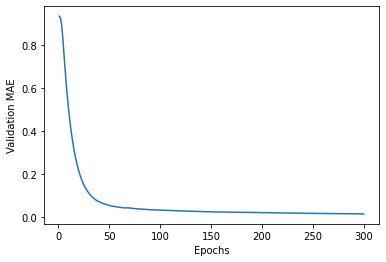

1000/1000 [==============================] - 0s 21us/step
Test MSE: 0.00040253587416373194
Test MAE 0.014745415687561035


In [0]:
import numpy as np
from keras import models
#from keras.models import Sequential
from keras import layers
from keras import callbacks
#from keras.layers import Dense
import matplotlib.pyplot as plt
from keras import optimizers
import tensorflow as tf

#Estructure based "boston_house_prices" example by François Chollet on "Deep Learning with Python"
#Define the estructure of the neural network (dont need to be so deep in this case):
def build_model():
    
    model = models.Sequential()
    model.add(layers.Dense(10, activation='sigmoid', input_dim=5))
    model.add(layers.Dense(5, activation='sigmoid'))
    #model.add(layers.Dense(264, activation='sigmoid'))
    #model.add(layers.Dense(132, activation='sigmoid'))
    #model.add(layers.Dense(66, activation='sigmoid'))
    #model.add(layers.Dense(660, activation='relu', input_shape=(66*2,)))
    model.add(layers.Dense(1))
    
    sgd = optimizers.SGD(lr=0.005);
    model.compile(#optimizer='rmsprop',
                  loss='mse', 
                  optimizer=sgd,
                  metrics=['mae'])
    
    return model

#Function that will generate a curve to be ploted:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

#Print the current "epoch" during training:
def epoca_feedback(epoch, logs):
    print(epoch)

#Define the callbacks list (a keras functionality):
callbacks_list = [callbacks.LambdaCallback(on_epoch_end=epoca_feedback)]

#Import the generated data:
train_samples = np.load('/content/drive/My Drive/Colab Notebooks/adding_binary_numbers_with_DL/train_samples.npy')
train_labels = np.load('/content/drive/My Drive/Colab Notebooks/adding_binary_numbers_with_DL/train_labels.npy')
test_samples = np.load('/content/drive/My Drive/Colab Notebooks/adding_binary_numbers_with_DL/test_samples.npy')
test_labels = np.load('/content/drive/My Drive/Colab Notebooks/adding_binary_numbers_with_DL/test_labels.npy')

#Number of epochs:
num_epochs = 300

#Train the deep neural net:
model = build_model()
history = model.fit(train_samples[:800],
                    train_labels[:800],
                    validation_data = (train_samples[800:], train_labels[800:]),
                    epochs = num_epochs,
                    batch_size = 1,
                    verbose = 1,
                    callbacks=callbacks_list
                    )
    
#Save the logs of the training to be ploted:
all_mae_histories = []
mae_history = history.history['val_mean_absolute_error']
all_mae_histories.append(mae_history)
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

smooth_mae_history = smooth_curve(average_mae_history)

#Print the curve
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

#Test with new data (test data that we generated)
test_mse_score, test_mae_score = model.evaluate(test_samples, test_labels)
print("Test MSE:", test_mse_score)
print("Test MAE", test_mae_score)

#Export the trained deep neural net so we can use it after
model.save('trained_network')
